
## Float vertical position control


---

Luc's case (see his [online course](https://youtu.be/EPvYEzhSFYs)
):

$$
\begin{align}
\partial_t d &= v \\
m\partial_t v &= mg - \rho_0 l^2 \max(0,l+\min(d,0))~g -\frac{1}{2} \rho_0 v |v| l^2 c_x \\ 
\partial_t b &= u
\end{align}
$$

where $d$ is the depth, $v$ is downward velocity, $l$ is the float width, $m$ its mass
with $m = (1+\beta b)\rho_0 l^3$, $\beta$ is a constant.

$c_w=O(1)$


In [1]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import time

from matplotlib import animation, rc
from IPython.display import HTML


def draw_float(x, d0=None):
    #time.sleep(0.1)
    #ax = plt.gca()
    plt.cla()
    ax.set_xlim(-ech,ech)
    ax.set_ylim(-1.8*ech,.2*ech)
    x=x.flatten()
    # plot ocean
    plt.plot([-10,10],[0,0],color='k',lw=1)
    P = np.array([[-ech,-1.8*ech],[ech,-1.8*ech],[ech,0],[-ech,0]])
    ax.add_patch(Polygon(P,True,facecolor='CadetBlue',edgecolor='black'))
    # plot float
    d=x[0]
    plt.plot([0,L,L,0.,0.],[-L-d,-L-d,-d,-d,-L-d],color='k',lw=2.)
    # draw balast
    b=-x[2]
    P=np.array([[0,-L-d+L],[L,-L-d+L],[L,-L/2.-L*b/2.-d],[0,-L/2-L*b/2.-d]])
    ax.add_patch(Polygon(P,True,color='orange'))
    # add desired depth
    if d0 is not None:
        plt.plot([-ech,ech],[-d0,-d0],'r',lw=1)

<IPython.core.display.Javascript object>


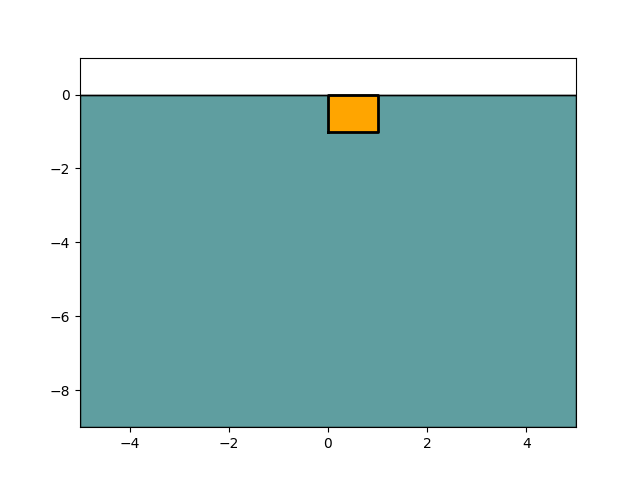

In [2]:
        
def f(x,u):
    ''' x=[d,v,b]
    '''
    d, v, b = x[0], x[1], x[2]
    dv = g - (g*np.max([0.,L+np.min([d,0.])])+v*np.abs(v)*cx/2.)/(1.+.1*b)
    return np.array([v,dv,u])

# input parameters
ech=5.
L=1.
x=np.array([3.,0.,-1.])
dt=.05
#
rho, g, cx = 1000., 9.81, 1.05

#ax=fig.add_subplot(111,aspect='equal')
X=x
for t in np.arange(0,10,dt):
    u=0.
    x+=f(x,u)*dt
    #draw_float(x)
    X = np.vstack((X,x))

drawf = lambda i: draw_float(X[i,:]) # wrapper
#fig=plt.figure(0)
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, drawf,frames=X.shape[0], interval=20, blit=False)
HTML(anim.to_html5_video())

## [Link](https://vimeo.com/244356079) to online video


---

## with a control

Sliding mode controler:

- sliding mode surface $s(x,t)=(\partial_{tt} y_d - \partial_{tt} y) 
+ 2(\partial_{t} y_d - \partial_{t} y) + (y_d - y)$, where $y_d$ is the desired depth. $e=y_d-y$ is a measure of error then.

- set u to 1 if $s>0$ and -1 if $s<0$

- Leads to a stable control with a time scale of 1 second.

<IPython.core.display.Javascript object>


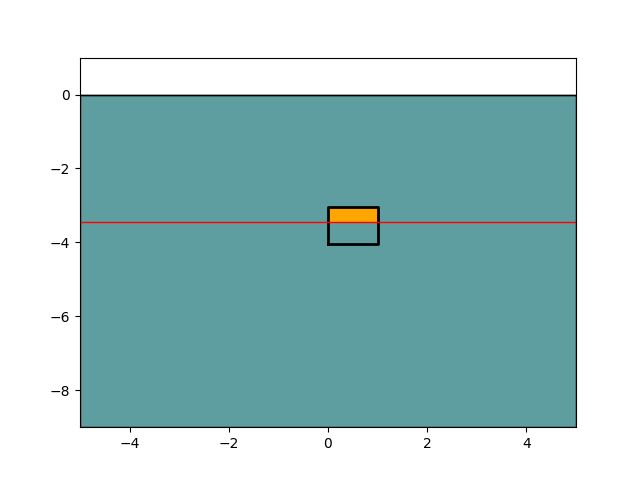

In [4]:
def control(x,d0,d0dot,d0ddot):
    d, v, b = x[0], x[1], x[2]
    return np.sign(d0ddot-(g-(g*L+v*np.abs(v)*cx/2.)/((1.+.1*b)*L)) + 2*(d0dot-v) +(d0-d) )


# input parameters
x=np.array([3.,0.,0.])
#
d0 = 5. # desired depth
d0dot = 0.
d0ddot = 0.

X=x
for t in np.arange(0,10,dt):
    if False:
        d0 = 5. # desired depth
        d0dot = 0.
        d0ddot = 0.
    else:
        d0 = 3. + np.sin(.5*t) # desired depth
        #d0dot = .5*np.cos(.5*t)
        #d0ddot = -.25*np.sin(.5*t)
        # assumes derivates are not known (for an isotherm for example)
        d0dot = 0.
        d0ddot = 0.
    u=control(x,d0,d0dot,d0ddot)
    x+=f(x,u)*dt
    if np.abs(x[2])>1: x[2]=np.sign(x[2])
    #draw_float(x)
    X = np.vstack((X,x))

drawf = lambda i: draw_float(X[i,:],d0=3.+np.sin(.5*i*dt)) # wrapper
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, drawf,frames=X.shape[0], interval=20, blit=False)
HTML(anim.to_html5_video())

## [Link](https://vimeo.com/244355842) to online video


In [6]:
#from ipywidgets import interact
#interact(drawf, i=(0,X.shape[0]-1))

# call the animator. blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, drawf,frames=X.shape[0], interval=20, blit=False)
#HTML(anim.to_jshtml())
#HTML(anim.to_html5_video())
#rc('animation', html='html5')